## Problema 1

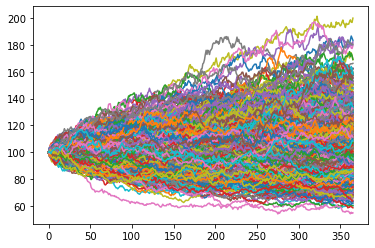

El precio del derivado es : 10.161238672271274


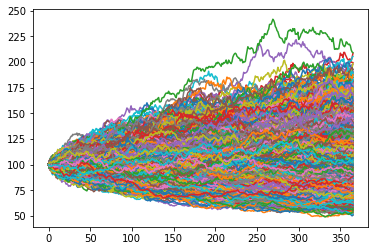

El precio del derivado es : 10.468404084076566


In [3]:
# Simulación de un Movimiento Browniano Geométrico
import matplotlib.pyplot as plt 
import numpy as np
import math
import pandas as pd
def calculoDeOpcion(M, precio_inicial, volatilidad, dt, T, o, strike, tasa_libre_riesgo):
  ## Número de simulaciones (M)
  ## precio inicial (precio_inicial)
  ## cambios en el tiempo (dt) 
  ## media del subyacente drift (media del subyacente)
  ## vol del suyacente (volatilidad) 
  ## Plazo de vencimiento (T)
  # Tipo de opciion digital (o), si se quiere10.472683047405093 una opcion call se coloca "c" en la variable, si se quiere una opcion tipo put se coloca "p" en la variable
  payoffs_opcion_europea = []
  paths = []
  for i in range(0, M):
    precio_actual = precio_inicial
    precios = []
    precios.append(precio_actual)
    t = T 
    while(t - dt > 0):
      # Simulacion de un Movimiento Browniano Estandar ()
      dWt = np.random.normal(0, math.sqrt(dt))                                
      # Cambios en el precio del subyacente
      #dSt = drift * precio_actual * dt + volatilidad * precio_actual * dWt  
      dSt = tasa_libre_riesgo*dt*precio_actual + volatilidad*dWt*precio_actual
      # Añadimos los cambios del subyacente al precio actual
      precio_actual += dSt       
      # Añadimos el precio actual al salto actual del subyacente                                             
      precios.append(precio_actual)                                           
      # Hacemos un decremento en el paso que dimos
      t = t - dt
    paths.append(precios)
  
  if o == "c":
    for price_path in paths:
      payoff = np.maximum(price_path[-1]-strike,0)
      payoffs_opcion_europea.append(payoff / (1 + tasa_libre_riesgo)**T)
  if o == "p":
    for price_path in paths:
      payoff = np.maximum(strike-price_path[-1],0)
      payoffs_opcion_europea.append(payoff / (1 + tasa_libre_riesgo)**T)

  # Ahora graficamos las trayectorias simuladas 

  for price_path in paths:
      plt.plot(price_path)
  plt.show()
  print("El precio del derivado es :", np.mean(payoffs_opcion_europea))

# Implementacion
## Ejemplo con tipo call
#Parametros
M = 1000
precio_inicial = 100 
#drift = 0.08 
volatilidad = 0.2
# Plazo de vencimiento en 1 año
T = 1    
# Saltos diarios en el subyacente             
dt = T / 365          
strike = 100
tasa_libre_riesgo = 0.05
o = "c"

calculoDeOpcion(M, precio_inicial, volatilidad, dt, T, o, strike, tasa_libre_riesgo)
M = 10000
calculoDeOpcion(M, precio_inicial, volatilidad, dt, T, o, strike, tasa_libre_riesgo)
M = 100000
calculoDeOpcion(M, precio_inicial, volatilidad, dt, T, o, strike, tasa_libre_riesgo)
M = 1000000
#calculoDeOpcion(M, precio_inicial, volatilidad, dt, T, o, strike, tasa_libre_riesgo)

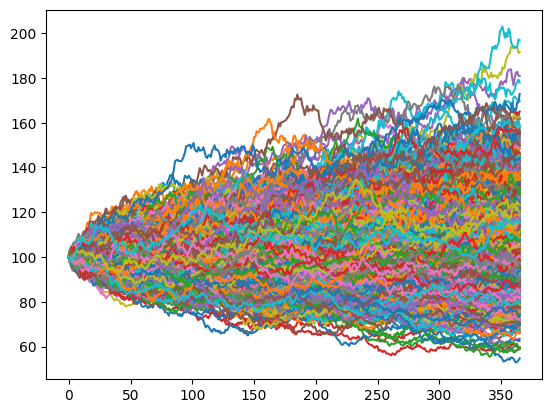

El precio del derivado es : 5.287132786522263


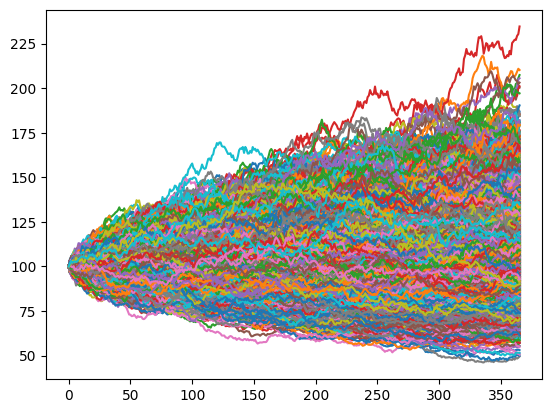

El precio del derivado es : 5.5380392700434795


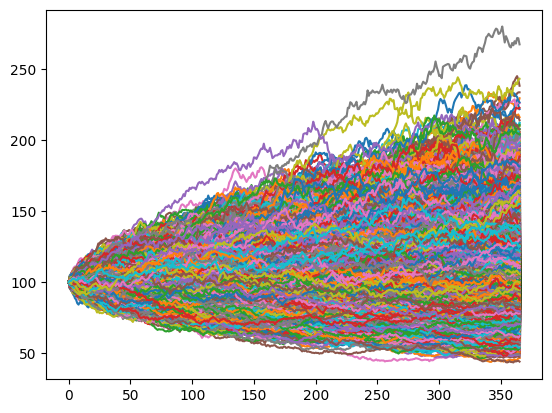

El precio del derivado es : 5.594273684466119


In [ ]:
## Ejemplo con tipo put
#Parametros
M = 1000
precio_inicial = 100 
#drift = 0.08 
volatilidad = 0.2
# Plazo de vencimiento en 1 de año 
T = 1  
# Saltos diarios en el subyacente             
dt = T / 365          
strike = 100
tasa_libre_riesgo = 0.05
o = "p"

calculoDeOpcion(M, precio_inicial, volatilidad, dt, T, o, strike, tasa_libre_riesgo)
M = 10000
calculoDeOpcion(M, precio_inicial, volatilidad, dt, T, o, strike, tasa_libre_riesgo)
M = 100000
calculoDeOpcion(M, precio_inicial, volatilidad, dt, T, o, strike, tasa_libre_riesgo)
M = 1000000
calculoDeOpcion(M, precio_inicial, volatilidad, dt, T, o, strike, tasa_libre_riesgo)

In [2]:
def calculate_option_price(S, K, r, sigma, T):
    d1 = (math.log(S/K) + (r + sigma**2/2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    Nd1 = cumulative_normal_distribution(d1)
    Nd2 = cumulative_normal_distribution(d2)

    call_price = S * Nd1 - K * math.exp(-r * T) * Nd2
    put_price = K * math.exp(-r * T) * (1 - Nd2) - S * (1 - Nd1)

    return call_price, put_price

def cumulative_normal_distribution(x):
    return (1.0 + math.erf(x / math.sqrt(2.0))) / 2.0

# Con base en los datos del ejercicio, obtenemos lo siguiente:

S = 100.0  # Precio actual del activo subyacente
K = 100.0  # Precio de ejercicio
r = 0.05   # Tasa libre de riesgo
sigma = 0.2   # Volatilidad
T = 1.0    # Vencimiento en años

call_price, put_price = calculate_option_price(S, K, r, sigma, T)

print("Prima de la opción de compra (call):", call_price)
print("Prima de la opción de venta (put):", put_price)

Prima de la opción de compra (call): 10.450583572185565
Prima de la opción de venta (put): 5.573526022256971


## Problema 2

In [ ]:
import numpy as np
#Creamos una funcion que recibe las entradas:
# Precio inicial (precio_inicial)  
# Strike (K)                    
# Tiempo de maduracion en años (T)                     
# Tasa libre de riesgo de manera anual (r)
# Numero de pasos (N)                     
# Factor de subida up (u)                    
# Factor de bajada down (d)
# Tipo de opcicion digital (o), si se quiere una opcion call se coloca "c" en la variable, si se quiere una opcion tipo put se coloca "p" en la variable    
# Monto que paga la opción al vencimiento (M)             
                      
def arbolBinomial (N, precio_inicial, u, d, K, r, T, M, o):
    # Constantes dentro del arbol
    dt = T / N
    q = (np.exp(r*dt) - d) / (u - d)
    fac_desc = 1/(1 + r) ** dt #1 / (1+r)**dt np.exp(-r * dt)
    
    # Primero generamos las trayectorias del activo subyacente 
    subyacente = []
    for j in range(0, N + 1):
        subyacente.append( precio_inicial * u**j * d ** (N-j) )
        # subyacente[j] = precio_inicial * u**j * d**(N-j)

    # Calculamos los payoffs de los nodos finales 
    payoff_europea = []
    if o == "p":
        for j in range(0,N+1):
            #payoff_europea.append( np.maximum(K - subyacente[j], 0) )
            if subyacente[j] < K:
                payoff_europea.append(M)
            else:
                payoff_europea.append(0)

    if o == "c":
        for j in range(0,N+1):
            #payoff_europea.append ( np.maximum(subyacente[j] - K, 0) )
            if K < subyacente[j]:
                payoff_europea.append(M)
            else:
                payoff_europea.append(0)


    # Trabajamos el arbol hacia atras
    for i in np.arange(N, 0, -1):
        for j in range(0,i):
            payoff_europea[j] = fac_desc * ( q * payoff_europea[j+1] + (1-q) * payoff_europea[j] )
    
    return payoff_europea[0]

In [ ]:
# Implementacion
N = 5
precio_inicial = 4
u= 2
d = 0.5
r = 0.25
o = "c"
K = 4
#El tiempo es 1/4 de año que son 3 meses
M = 100
T = .25

                    

arbolBinomial(N, precio_inicial, u, d, K, r, T, M, o)

21.038398434152327